In [ ]:
# Name- Pranav Shelke(BE-IT)
# Roll.no- 69
# Assignment No- 03
# Problem Statement- Build the Image classification model by dividing the model into following 4 stages:
# a. Loading and preprocessing the image data
# b. Defining the model’s architecture
# c. Training the model
# d. Estimating the model’s performance

In [ ]:
#Small Image Classification Using Convolutional Neural Network (CNN)
#https://www.youtube.com/watch?v=7HPwo4wnJeA


In [ ]:
#In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. 
#There are total 10 classes as shown below. We will use CNN for classification

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

X_train.shape  # to check the  shape of x train 50,000 sample with 32 by 32 image with RGB 3 




(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]   #y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

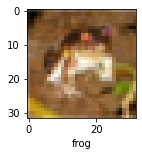

In [ ]:
plot_sample(X_train, y_train, 0)

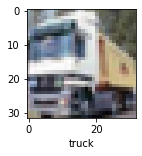

In [ ]:
plot_sample(X_train, y_train, 1)

In [ ]:
# Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. 
# Hence to normalize in 0-->1 range, we need to divide it by 255

In [ ]:
# Normalizing the training data

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

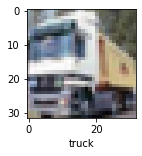

In [ ]:
plot_sample(X_train, y_train, 1)

In [ ]:
# Build simple (ANN) artificial neural network for image classification

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.8141 - accuracy: 0.3517
Epoch 2/5
1563/1563 [==============================] - 105s 68ms/step - loss: 1.6246 - accuracy: 0.4266
Epoch 3/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.5434 - accuracy: 0.4538
Epoch 4/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4827 - accuracy: 0.4778
Epoch 5/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.4339 - accuracy: 0.4943


In [ ]:
#You can see that at the end of 5 epochs, accuracy is at around 49% 

In [ ]:
#from sklearn.metrics import confusion_matrix , classification_report
#import numpy as np
#y_pred = ann.predict(X_test)
#y_pred_classes = [np.argmax(element) for element in y_pred]

#print("Classification Report: \n", classification_report(y_test, y_pred_classes))

In [ ]:
# Now let us build a convolutional neural network to train our images

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4570 - accuracy: 0.4764
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0995 - accuracy: 0.6135
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9698 - accuracy: 0.6630
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8855 - accuracy: 0.6899
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8166 - accuracy: 0.7161
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7593 - accuracy: 0.7366
Epoch 7/10
1563/1563 [==============================] - 66s 43ms/step - loss: 0.7092 - accuracy: 0.7523
Epoch 8/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6639 - accuracy: 0.7681
Epoch 9/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6193 - accuracy: 0.7849
Epoch 10/10
1563/1563 [==============================] - 65s 41m

In [ ]:
# With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN.
# CNN's are best for image classification and gives superb accuracy.
# Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 2.3026 - accuracy: 0.1000


[2.302611827850342, 0.10000000149011612]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[0.10052627, 0.09905639, 0.09914068, 0.1014569 , 0.09946056,
        0.10031298, 0.10034382, 0.09925792, 0.1001635 , 0.10028098],
       [0.10052627, 0.09905639, 0.09914068, 0.1014569 , 0.09946056,
        0.10031298, 0.10034382, 0.09925792, 0.1001635 , 0.10028098],
       [0.10052627, 0.09905639, 0.09914068, 0.1014569 , 0.09946056,
        0.10031298, 0.10034382, 0.09925792, 0.1001635 , 0.10028098],
       [0.10052627, 0.09905639, 0.09914068, 0.1014569 , 0.09946056,
        0.10031298, 0.10034382, 0.09925792, 0.1001635 , 0.10028098],
       [0.10052627, 0.09905639, 0.09914068, 0.1014569 , 0.09946056,
        0.10031298, 0.10034382, 0.09925792, 0.1001635 , 0.10028098]],
      dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:6]

[3, 3, 3, 3, 3, 3]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

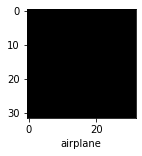

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'cat'

In [ ]:
classes[y_classes[100]]

'cat'